Dataset : https://www.kaggle.com/datasets/vinicius150987/titanic3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_paths = "/content/drive/MyDrive/EGBI222_Pair Project/titanic3.xls"

In [ ]:
import pandas as pd
sv_rate = pd.read_excel(file_paths)

sv_rate.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
sv_rate.shape

(1309, 14)

In [ ]:
sv_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [ ]:
sv_rate_cleaned = sv_rate.dropna(subset=['fare'])

sv_rate_cleaned.shape

(1308, 14)

In [ ]:
sv_rate_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1308 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1308 non-null   int64  
 1   survived   1308 non-null   int64  
 2   name       1308 non-null   object 
 3   sex        1308 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1308 non-null   int64  
 6   parch      1308 non-null   int64  
 7   ticket     1308 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1306 non-null   object 
 11  boat       486 non-null    object 
 12  body       120 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 153.3+ KB


# **Data** **Visualization**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

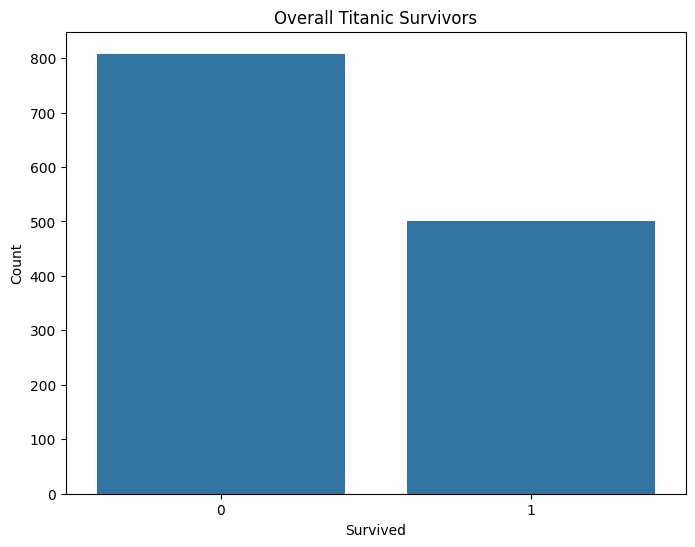

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Overall Titanic Survivors")
sns.countplot(x ='survived', data=sv_rate_cleaned)
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

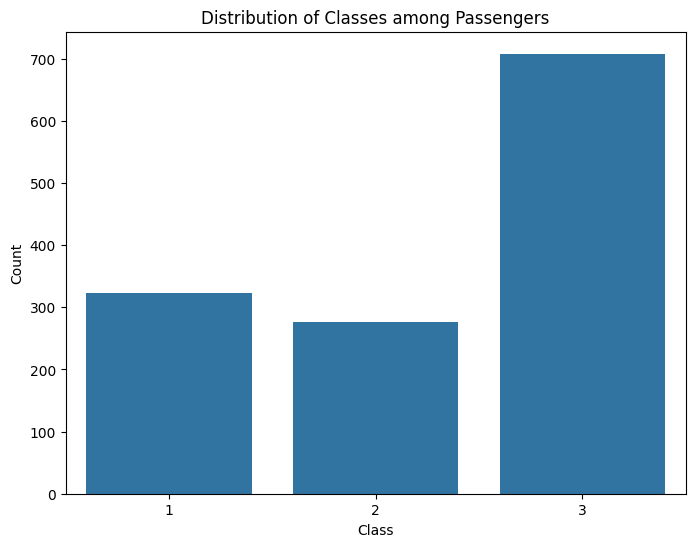

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Distribution of Classes among Passengers")
sns.countplot(x ='pclass', data=sv_rate_cleaned)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

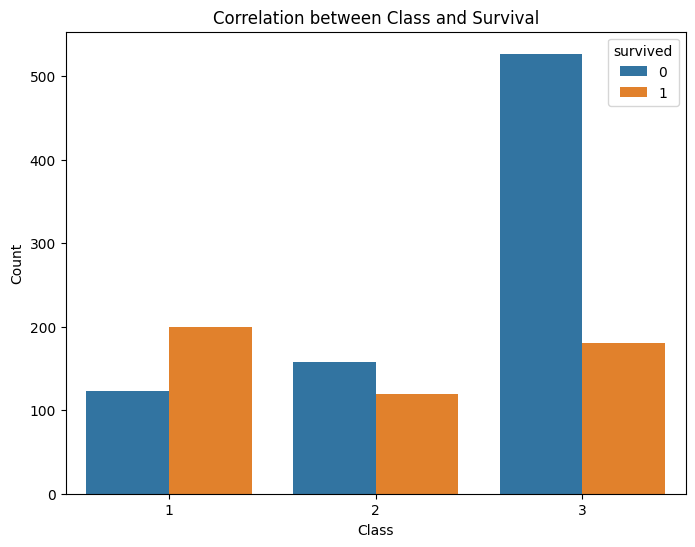

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Correlation between Class and Survival")
sns.countplot(x='pclass', hue='survived', data=sv_rate_cleaned)
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

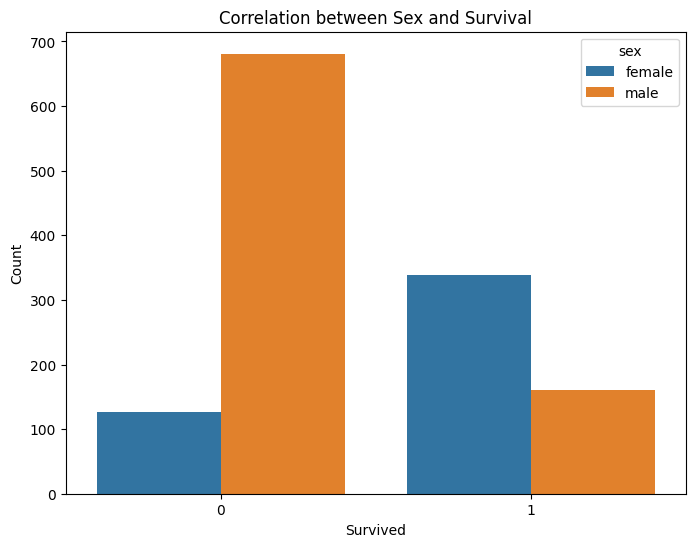

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Correlation between Sex and Survival")
sns.countplot(x='survived', hue='sex', data=sv_rate_cleaned)
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

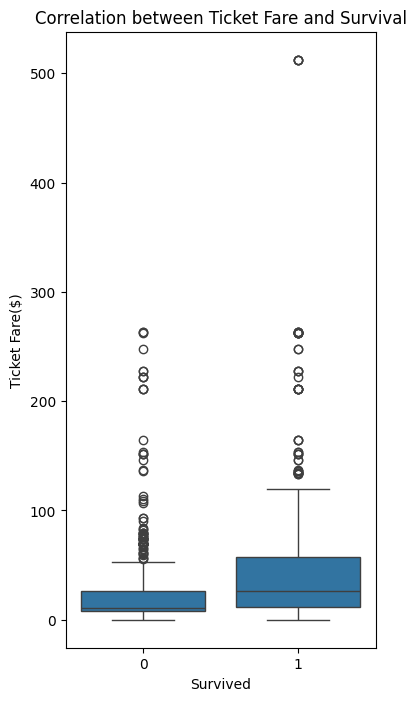

In [ ]:
plt.figure(figsize=(4, 8))
plt.title("Correlation between Ticket Fare and Survival")
sns.boxplot(x = 'survived', y = 'fare', data=sv_rate_cleaned)
plt.xlabel("Survived")
plt.ylabel("Ticket Fare($)")
plt.show()

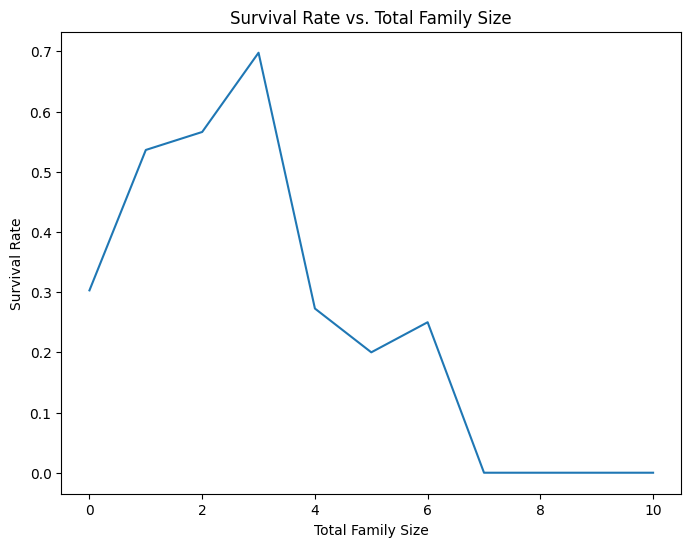

In [ ]:
sv_rate_cleaned.loc[:, 'family_size'] = sv_rate_cleaned['sibsp'] + sv_rate_cleaned['parch']

survival_by_family_size_total = sv_rate_cleaned.groupby('family_size')['survived'].mean().reset_index()


plt.figure(figsize=(8, 6))
sns.lineplot(x='family_size', y='survived', data=survival_by_family_size_total)
plt.title('Survival Rate vs. Total Family Size')
plt.xlabel('Total Family Size')
plt.ylabel('Survival Rate')
plt.show()